[[1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]]
[[13 17]
 [14 10]]


C:\Users\mohin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mohin\AppData\Local\Temp\ipykernel_10172\281256359.py:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


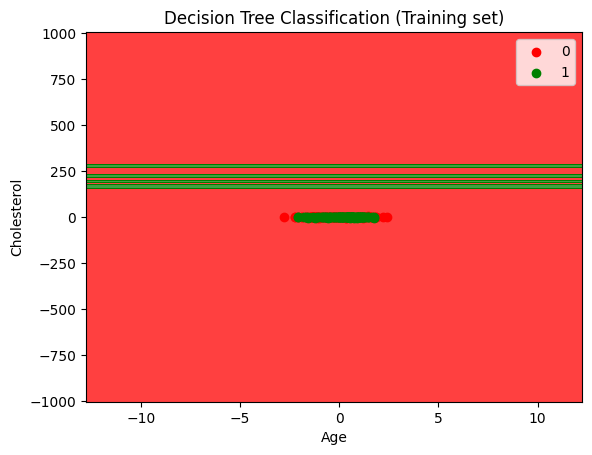

In [78]:
# Here's the updated code for visualizing the dataset using a pair plot:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Assume the dataset is in a CSV file called 'data.csv'
# data = pd.read_csv('data.csv')
data=pd.read_csv('C:/Users/mohin/Desktop/AI SAKSHAM/documents/heart_v2.csv')

# # Rename the columns for clarity
data.columns = ['age', 'sex', 'BP', 'cholesterol', 'heart_disease']


# If you want to visualize the data using a decision boundary plot, you can select only 2 features to plot, for example:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # Assume the dataset is in a CSV file called 'data.csv'
# data = pd.read_csv('data.csv')

# # Rename the columns for clarity
# data.columns = ['age', 'sex', 'BP', 'cholesterol', 'heart_disease']

# # Split the data into features (X) and target (y)
X = data[['age', 'cholesterol']]
y = data['heart_disease']

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Scale the data using StandardScaler
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # Train a classifier (e.g., Decision Tree)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
#reshape for change the dimension , convert 1 column to 2 columns

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))


y_pred,y_test

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Create a meshgrid for the plot
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_train[:, 1].min() - 1000, stop = X_train[:, 1].max() + 1000, step = 0.25))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot the training points
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# Add title and labels
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()



# This code will create a decision boundary plot using the age and cholesterol features. You can adjust the features used for the plot by changing the columns selected in the X variable.

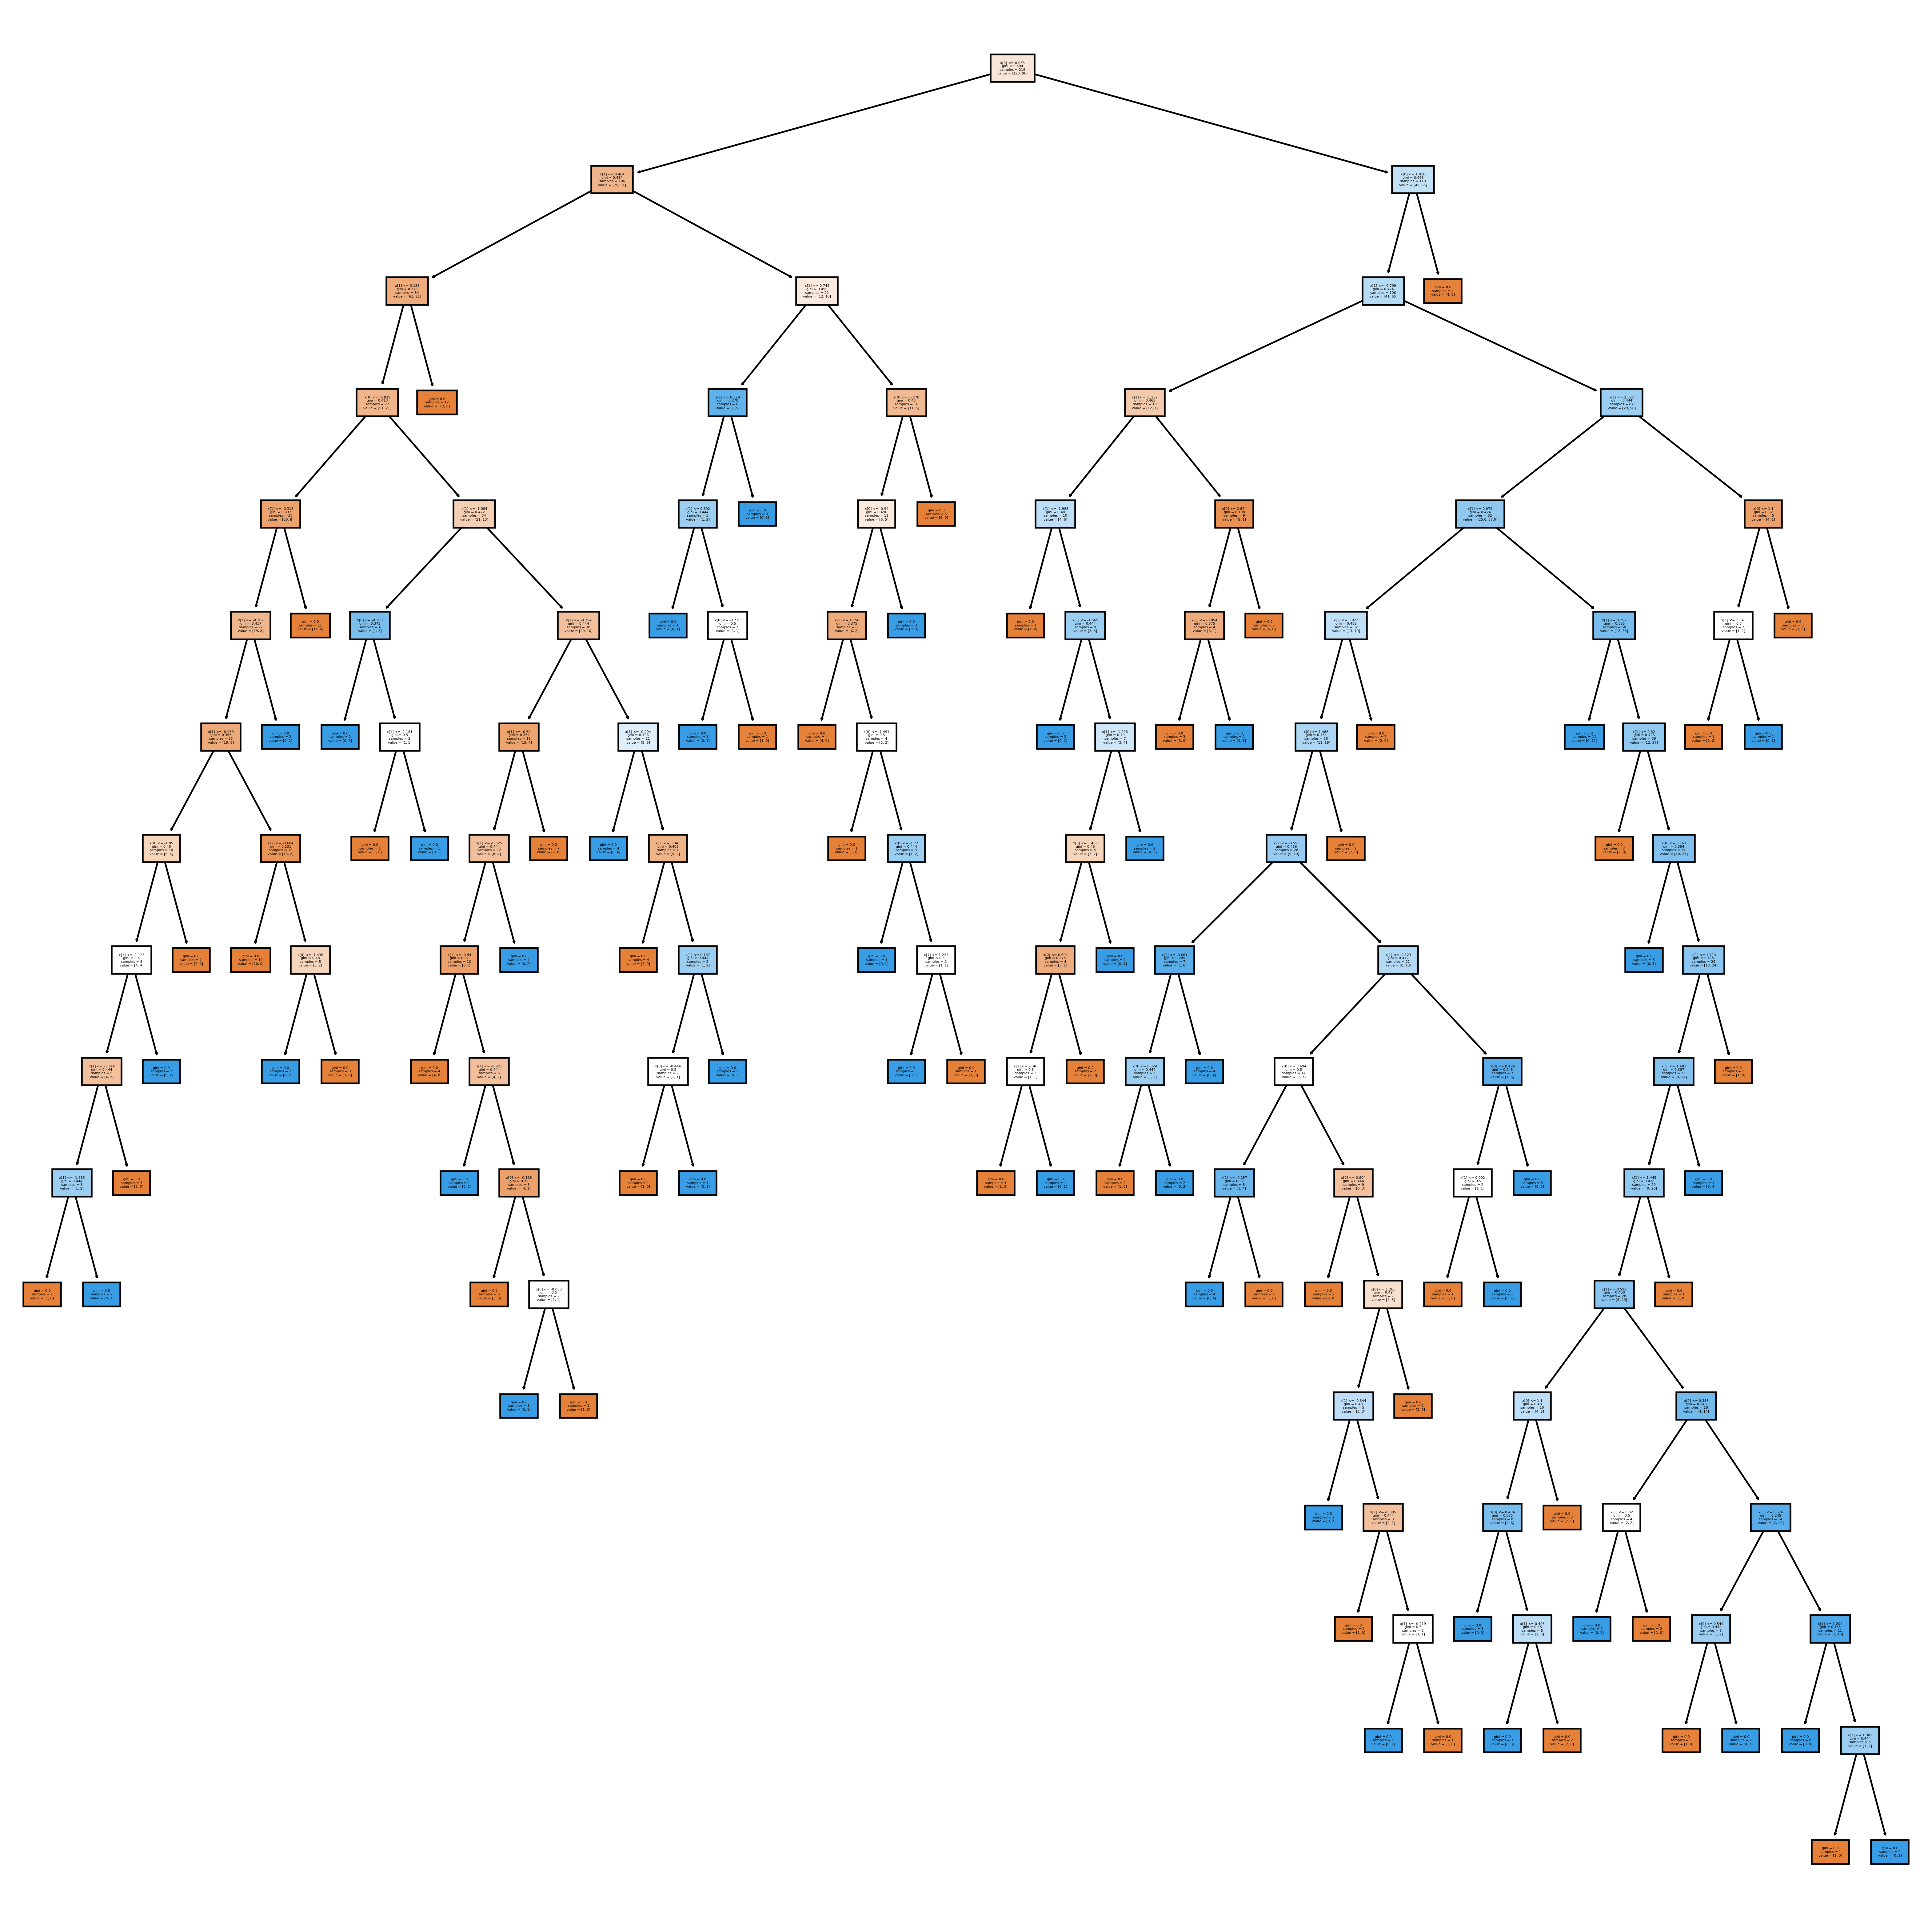

In [79]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_pred,y_test))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=400)
plot_tree(classifier, filled=True, ax=axes, fontsize=2)
plt.show()
